# Phân tích các câu hỏi về thời gian sử dụng internet

## Init Data

In [2]:
#import lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

train_df.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# feature category
features = ["Basic_Demos-Enroll_Season","CGAS-Season","Physical-Season","FGC-Season","BIA-Season","PAQ_A-Season","PAQ_C-Season","PCIAT-Season","SDS-Season","PreInt_EduHx-Season",
            "PCIAT-PCIAT_01","PCIAT-PCIAT_02","PCIAT-PCIAT_03","PCIAT-PCIAT_04","PCIAT-PCIAT_05","PCIAT-PCIAT_06",
            "PCIAT-PCIAT_07","PCIAT-PCIAT_08","PCIAT-PCIAT_09","PCIAT-PCIAT_10","PCIAT-PCIAT_11","PCIAT-PCIAT_12","PCIAT-PCIAT_13","PCIAT-PCIAT_14","PCIAT-PCIAT_15",
            "PCIAT-PCIAT_16","PCIAT-PCIAT_17","PCIAT-PCIAT_18","PCIAT-PCIAT_19","PCIAT-PCIAT_20","PreInt_EduHx-computerinternet_hoursday", "sii"]
def convert_cate(df, features):
    for i in features:
        if i in df.columns:
            df[i] = df[i].astype("category")
convert_cate(test_df, features)
convert_cate(train_df, features) 

# feature float64
features = []
def convert_float(df, features):
    for i in features:
        if i in df.columns:
            df[i] = df[i].astype("float64")
convert_float(test_df, features)
convert_float(train_df, features) 

# feature string
features = ["id"]
def convert_string(df, features):
    for i in features:
        if i in df.columns:
            df[i] = df[i].astype("string")
convert_string(test_df, features)
convert_string(train_df, features) 

###
###

## Lọc các feature cần phân tích


In [3]:
ana_features = ["PCIAT-PCIAT_01","PCIAT-PCIAT_02","PCIAT-PCIAT_03","PCIAT-PCIAT_04","PCIAT-PCIAT_05","PCIAT-PCIAT_06",
            "PCIAT-PCIAT_07","PCIAT-PCIAT_08","PCIAT-PCIAT_09","PCIAT-PCIAT_10","PCIAT-PCIAT_11","PCIAT-PCIAT_12","PCIAT-PCIAT_13","PCIAT-PCIAT_14","PCIAT-PCIAT_15",
            "PCIAT-PCIAT_16","PCIAT-PCIAT_17","PCIAT-PCIAT_18","PCIAT-PCIAT_19","PCIAT-PCIAT_20","PCIAT-PCIAT_Total"]

train_df[ana_features].head()



,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,...,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total
0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,...,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0
3,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,...,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###
###

## PCIAT-PCIAT_Total  


In [4]:
train_df['PCIAT-PCIAT_Total'].describe()

count    2736.000000
mean       27.896199
std        20.338853
min         0.000000
25%        12.000000
50%        26.000000
75%        41.000000
max        93.000000
Name: PCIAT-PCIAT_Total, dtype: float64

<Axes: xlabel='PCIAT-PCIAT_Total', ylabel='Count'>

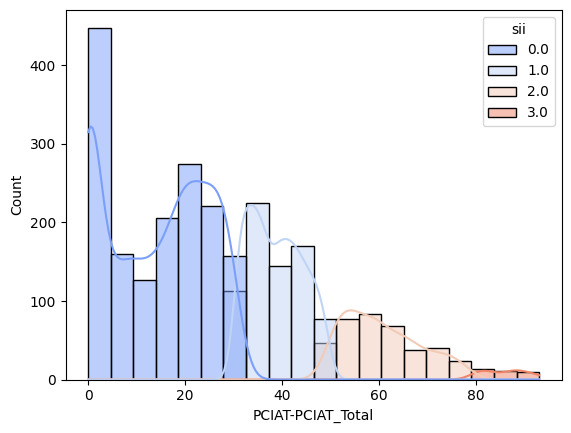

In [5]:
sns.histplot(data=train_df, x='PCIAT-PCIAT_Total', hue='sii', bins=20, kde=True, palette='coolwarm')

Type: __`int`__'  
Range: __`min`__ = 0, __`max`__ = 93

- 0-30 sii = 0
- 30-50 sii = 1
- 50-80 sii = 2
- \> 80 sii = 3

In [20]:
train_df['PCIAT-PCIAT_Total'].isna().sum()

np.int64(1224)

In [21]:
train_df['sii'].isna().sum()

np.int64(1224)

# Fill các dữ liệu trống trong PCIAT


## Lấy các feature cần thiết

In [34]:
#Questions
q_fts = ["PCIAT-PCIAT_01","PCIAT-PCIAT_02","PCIAT-PCIAT_03","PCIAT-PCIAT_04","PCIAT-PCIAT_05","PCIAT-PCIAT_06",
            "PCIAT-PCIAT_07","PCIAT-PCIAT_08","PCIAT-PCIAT_09","PCIAT-PCIAT_10","PCIAT-PCIAT_11","PCIAT-PCIAT_12","PCIAT-PCIAT_13","PCIAT-PCIAT_14","PCIAT-PCIAT_15",
            "PCIAT-PCIAT_16","PCIAT-PCIAT_17","PCIAT-PCIAT_18","PCIAT-PCIAT_19","PCIAT-PCIAT_20"]

q_train_df = train_df[q_fts]

#Total Score
ts_train_df = train_df['PCIAT-PCIAT_Total'].to_frame()
ts_train_df['Recal'] = train_df[q_fts].apply(
    lambda row: row.sum() if row.notnull().all() else None, axis=1
)


In [35]:
#Loại bỏ null
ts_train_df['Recal'].isnull().sum()  

np.int64(1289)

In [38]:
differences = ts_train_df[

    ~((ts_train_df['Recal'] == ts_train_df['PCIAT-PCIAT_Total']) |

      (ts_train_df['Recal'].isna() & ts_train_df['PCIAT-PCIAT_Total'].isna()))
]

(differences[['PCIAT-PCIAT_Total', 'Recal']])
differences['Recal'].isnull().sum()

np.int64(65)

# LL

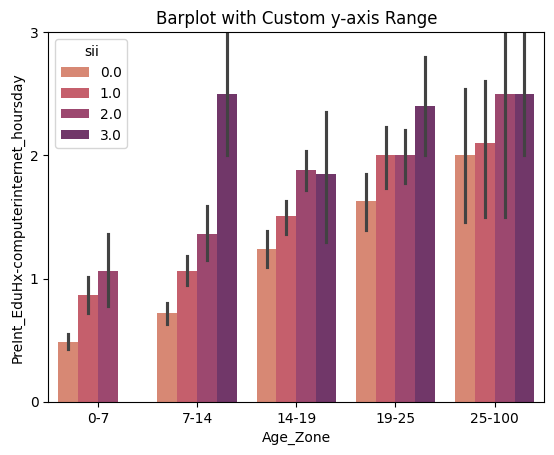

In [9]:
train_df['Age_Zone'] = pd.cut(train_df['Basic_Demos-Age'], bins=5, labels=["0-7", "7-14", "14-19", "19-25", "25-100"])

sns.barplot(data = train_df, x = 'Age_Zone', y = 'PreInt_EduHx-computerinternet_hoursday', hue = 'sii', palette = 'flare')
plt.ylim(0, 3)  # Đặt giới hạn từ 0 đến 3
plt.yticks(range(4))  # Đặt các ticks: 0, 1, 2, 3
plt.title("Barplot with Custom y-axis Range")
plt.show()

In [11]:
train_df[train_df['PreInt_EduHx-computerinternet_hoursday'] == 3]

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,Age_Zone
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0,0-7
6,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.0,84.6,...,1.0,0.0,20.0,Winter,27.0,40.0,Fall,3.0,0.0,7-14
18,00e6167c,Winter,6,0,Spring,60.0,Winter,30.094649,37.5,60.2,...,1.0,0.0,28.0,Winter,39.0,55.0,Winter,3.0,0.0,0-7
21,00f574e9,Summer,16,0,NaN,NaN,Summer,29.285856,71.0,210.0,...,1.0,0.0,30.0,NaN,NaN,NaN,Summer,3.0,0.0,19-25
23,01182ce3,Winter,13,0,Summer,72.0,Winter,20.613064,69.0,139.6,...,2.0,1.0,51.0,Winter,48.0,67.0,Winter,3.0,2.0,14-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3858,f8bf4a1c,Fall,15,0,Winter,31.0,Fall,28.065268,68.0,184.6,...,0.0,0.0,1.0,Winter,27.0,40.0,Fall,3.0,0.0,14-19
3935,fdd9799f,Spring,15,0,Summer,48.0,Summer,29.404637,66.0,182.2,...,4.0,2.0,45.0,Summer,40.0,56.0,Spring,3.0,1.0,14-19
3938,fe102a25,Summer,5,0,Winter,61.0,Summer,18.278557,43.5,49.2,...,0.0,0.0,34.0,NaN,NaN,NaN,Summer,3.0,1.0,0-7
3946,feb53635,Winter,14,0,Summer,70.0,Spring,19.036779,69.5,130.8,...,4.0,4.0,77.0,Spring,51.0,71.0,Winter,3.0,2.0,14-19


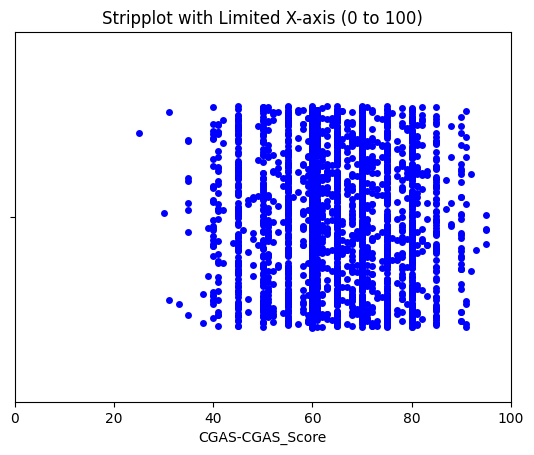

In [23]:
sns.stripplot(data = train_df, x = 'CGAS-CGAS_Score', size= 5, jitter=0.3, color ='blue')
plt.xlim(0, 100)  # Giới hạn trục x từ 0 đến 100
plt.title("Stripplot with Limited X-axis (0 to 100)")
plt.show()

In [26]:
train_df['SDS-SDS_Total_T'].describe()
train_df['SDS-SDS_Total_T'].corr(train_df['sii'])

np.float64(0.23298153659255055)

<Axes: xlabel='SDS-SDS_Total_Raw', ylabel='Count'>

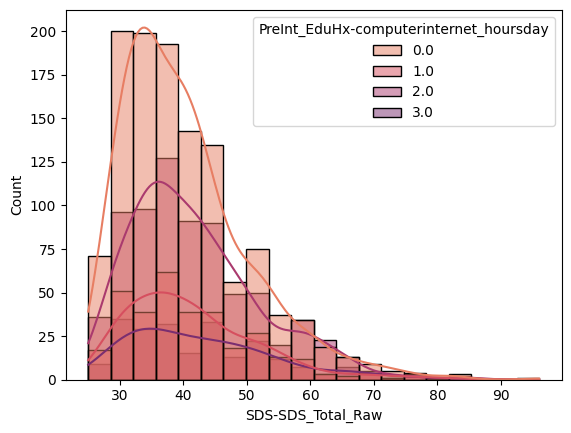

In [32]:
sns.histplot(data = train_df, x = 'SDS-SDS_Total_Raw', hue = 'PreInt_EduHx-computerinternet_hoursday', bins = 20, kde = True,
             palette = 'flare')
